In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, Lasso, RidgeCV
%matplotlib inline

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
from pandas_profiling import ProfileReport

In [5]:
report = ProfileReport(df)
report

In [6]:
df = pd.get_dummies(df, columns=['State'])
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


<AxesSubplot:>

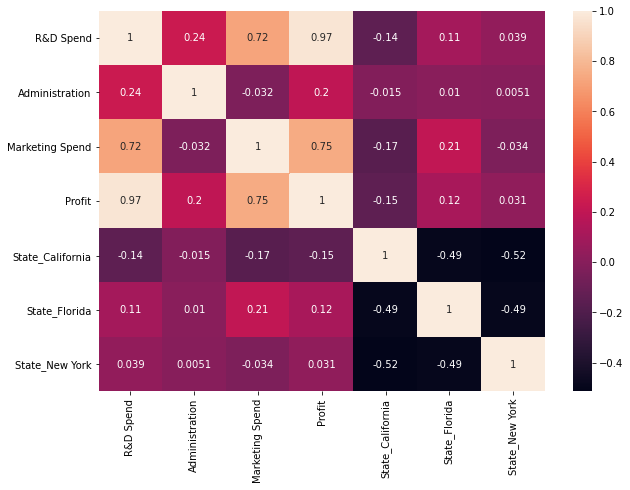

In [7]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)

In [8]:
df.head(2)

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


In [9]:
x = df[['R&D Spend','Administration','Marketing Spend','State_California','State_Florida','State_New York']]
y = df['Profit']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 10)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40, 6)
(10, 6)
(40,)
(10,)


# **Model building**

In [12]:
import statsmodels.api as sm
model = sm.OLS(y,x).fit()
predict = model.predict(x)

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 05 Mar 2022   Prob (F-statistic):           1.34e-27
Time:                        10:17:46   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Finding Multicollinearity**

In [14]:
x_var = df[['R&D Spend','Administration','Marketing Spend','State_California','State_Florida','State_New York']]

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1 =pd.DataFrame()
df1['Features'] = x_var.columns
df1['VIF'] = [variance_inflation_factor(x_var.values,i) for i in range(len(x_var.columns))] 
df1

,Features,VIF
0,R&D Spend,2.495511
1,Administration,1.177766
2,Marketing Spend,2.416797
3,State_California,9.044052
4,State_Florida,9.443578
5,State_New York,9.222969


In [16]:
#Dropping the State_California, State_Florida and State_New York as they have very high VIF value.

df2 = df.drop(columns=['State_California','State_Florida','State_New York'])
df2.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


**1.Log transformation**

In [17]:
log_x = np.log(df[['R&D Spend','Administration','Marketing Spend']]+1)
log_model = sm.OLS(y,log_x).fit()
predict = log_model.predict(log_x)

In [18]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              271.6
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    1.11e-29
Time:                        10:17:47   Log-Likelihood:                         -582.53
No. Observations:                  50   AIC:                                      1171.
Df Residuals:                      47   BIC:                                      1177.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend        1.122e+04   2025.647      5.540      0.000    7147.649    1.53e+04
Administration   -876.6340   1641.196     -0.534      0.596   -4178.295    2425.027
Marketing Spend   446.4577   1638.168      0.273      0.786   -2849.110    3742.026
==============================================================================
Omnibus:                        5.030   Durbin-Watson:                   0.444
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                4.946
Skew:                           0.748   Prob(JB):                       0.0843
Kurtosis:                       2.630   Cond. No.                         11.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2. Square root transformation of both x and y**

In [19]:
sqrt_x = np.sqrt(df[['R&D Spend','Administration','Marketing Spend']])
sqrt_model = sm.OLS(np.sqrt(y),sqrt_x).fit()
predict = sqrt_model.predict(sqrt_x)
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2396.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):                    2.20e-51
Time:                        10:17:47   Log-Likelihood:                         -235.70
No. Observations:                  50   AIC:                                      477.4
Df Residuals:                      47   BIC:                                      483.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.5012      0.054      9.277      0.000       0.393       0.610
Administration      0.4787      0.032     15.001      0.000       0.414       0.543
Marketing Spend     0.0822      0.030      2.699      0.010       0.021       0.143
==============================================================================
Omnibus:                        1.516   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.926
Skew:                           0.322   Prob(JB):                        0.629
Kurtosis:                       3.174   Cond. No.                         9.46
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R2 Table**

In [20]:
r2 = np.array([0.95,0.94,0.99])
r2 = pd.DataFrame(data = r2, index=[['Base Model','Log Transformation','Square root']], columns=['R2 value'])
r2

,R2 value
Base Model,0.95
Log Transformation,0.94
Square root,0.99


**CONCLUSION**
- Square root transformation is giving the highest score.

In [21]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import normalize

In [22]:
data = df2.copy()
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [23]:
X  = data[['R&D Spend','Administration','Marketing Spend']]
Y = data['Profit']

In [24]:
X = normalize(X)
X

array([[0.31900633, 0.26411537, 0.91020769],
       [0.32756301, 0.30495941, 0.89426072],
       [0.34294681, 0.22606362, 0.91174707],
       [0.33862972, 0.2783483 , 0.89880595],
       [0.35238805, 0.22662705, 0.90799936],
       [0.33070362, 0.25030226, 0.9099362 ],
       [0.56834481, 0.62147181, 0.53921884],
       [0.34450073, 0.38477307, 0.85631123],
       [0.32960386, 0.40664771, 0.85205571],
       [0.35598308, 0.31368211, 0.88027245],
       [0.37180672, 0.40347749, 0.83604167],
       [0.35387225, 0.3226534 , 0.87787768],
       [0.3174251 , 0.43056755, 0.84489816],
       [0.30552127, 0.45000055, 0.83914019],
       [0.37069634, 0.48382514, 0.79277832],
       [0.36832626, 0.39435538, 0.84191425],
       [0.2589657 , 0.40364491, 0.87750074],
       [0.28558943, 0.43771251, 0.85255289],
       [0.27862765, 0.34673377, 0.89562398],
       [0.49055449, 0.87141052, 0.        ],
       [0.23205365, 0.34651784, 0.9088875 ],
       [0.22663715, 0.44458487, 0.86659096],
       [0.

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)

- Applying a normal Linear regression model

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train,Y_train)
model_prediction = model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score
R_squared = r2_score(model_prediction, Y_test)
print(f'The R2 score is: {R_squared}')
mse = mean_squared_error(Y_test,model_prediction)
print('The MSE is: ', mse)

The R2 score is: 0.7484301281913095
The MSE is:  205670606.1150156


# Lasso Regression

In [33]:
X_df = pd.DataFrame(X, columns=['R&D Spend','Administration','Marketing Spend'])

In [30]:
alphas = [-5, -1, 1e-4, 1e-3, 1e-2, 1, 5]

def test_alpha(a):
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(X_train, Y_train) 
    pred_test_lasso = model_lasso.predict(X_test)
    new_score = r2_score(Y_test, pred_test_lasso)
    new_mse = mean_squared_error(Y_test, pred_test_lasso)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a, new_score, new_mse))
    
    
for alpha in alphas:
    test_alpha(alpha)

ALPHA: -5.000 R2 SCORE: 0.8397% new_score, 205061686.8
ALPHA: -1.000 R2 SCORE: 0.8393% new_score, 205546470.6
ALPHA: 0.000 R2 SCORE: 0.8392% new_score, 205670618.5
ALPHA: 0.001 R2 SCORE: 0.8392% new_score, 205670730.0
ALPHA: 0.010 R2 SCORE: 0.8392% new_score, 205671845.2
ALPHA: 1.000 R2 SCORE: 0.8391% new_score, 205795142.4
ALPHA: 5.000 R2 SCORE: 0.8387% new_score, 206305683.4


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26607979245.494476, tolerance: 6549883.634226939
  model = cd_fast.enet_coordinate_descent(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26740591411.980232, tolerance: 6549883.634226939
  model = cd_fast.enet_coordinate_descent(


The r2 score is:  0.7511645752042652


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26607979245.494476, tolerance: 6549883.634226939
  model = cd_fast.enet_coordinate_descent(


<BarContainer object of 3 artists>

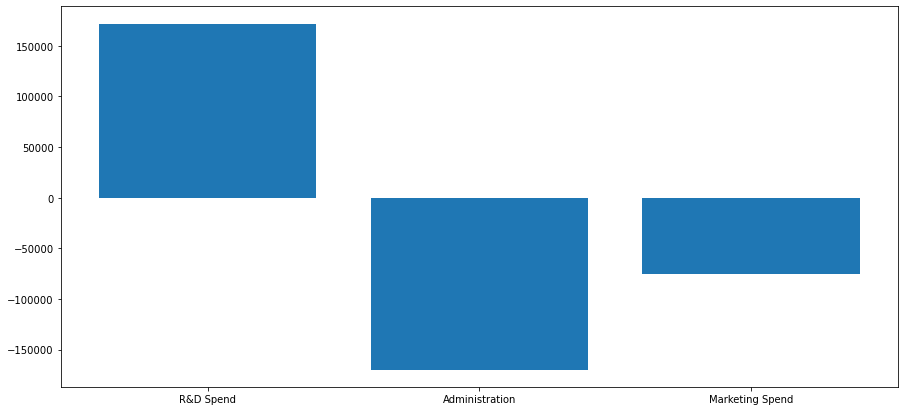

In [37]:
lasso_model = Lasso(alpha=-5.000)
lasso_model.fit(X_train,Y_train)
lasso_pred = lasso_model.predict(X_test)

r2 = r2_score(lasso_pred,Y_test)
print('The r2 score is: ', r2)

#Coefficient data

lasso_coef = pd.DataFrame()
lasso_coef['Coefficient'] = lasso_model.coef_
lasso_coef['Features'] = X_df.columns

plt.rcParams['figure.figsize'] = (15,7)

plt.bar(lasso_coef['Features'], lasso_coef['Coefficient'])

# Ridge regression

In [31]:
alphas = [-5, -1, 1e-4, 1e-3, 1e-2, 1,2, 5]

def test_alpha_ridge(a):
    model_lasso = Ridge(alpha=a)
    model_lasso.fit(X_train, Y_train) 
    pred_test_lasso = model_lasso.predict(X_test)
    new_score = r2_score(Y_test, pred_test_lasso)
    new_mse = mean_squared_error(Y_test, pred_test_lasso)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a, new_score, new_mse))
    
    
for alpha in alphas:
    test_alpha_ridge(alpha)

ALPHA: -5.000 R2 SCORE: -15.2992% new_score, 20844955457.2
ALPHA: -1.000 R2 SCORE: -3.0518% new_score, 5181830329.8
ALPHA: 0.000 R2 SCORE: 0.8391% new_score, 205719113.4
ALPHA: 0.001 R2 SCORE: 0.8388% new_score, 206160876.0
ALPHA: 0.010 R2 SCORE: 0.8350% new_score, 211030627.8
ALPHA: 1.000 R2 SCORE: 0.4925% new_score, 649026376.4
ALPHA: 2.000 R2 SCORE: 0.3667% new_score, 809934754.8
ALPHA: 5.000 R2 SCORE: 0.2125% new_score, 1007154398.1


The r2 score is:  0.7465129531798986


<BarContainer object of 3 artists>

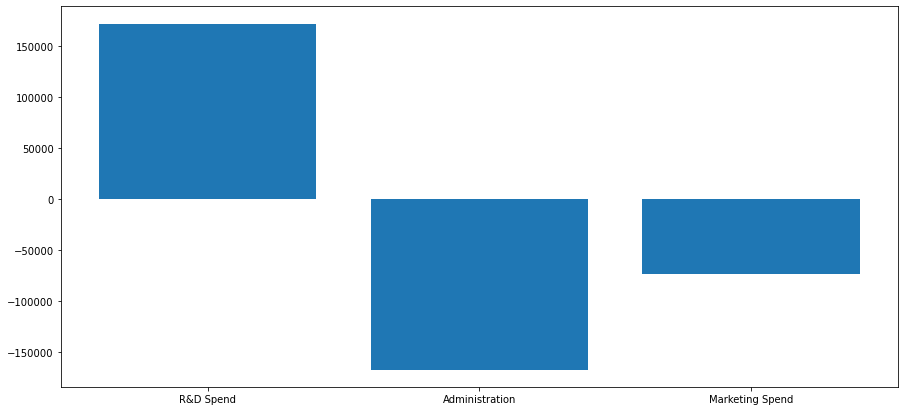

In [35]:
ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train,Y_train)
ridge_prediction = ridge_model.predict(X_test)

r2 = r2_score(ridge_prediction,Y_test)
print('The r2 score is: ', r2)

#Coefficient data

ridge_coef = pd.DataFrame()
ridge_coef['Coefficient'] = ridge_model.coef_
ridge_coef['Features'] = X_df.columns

plt.rcParams['figure.figsize'] = (15,7)

plt.bar(ridge_coef['Features'], ridge_coef['Coefficient'])

In [39]:
final_df = pd.DataFrame(data = np.array([0.74843,0.75116,0.74651]), index=['Base Model','Lasso_Reg','Ridge_Reg'], columns=['R2 value'])
final_df

,R2 value
Base Model,0.74843
Lasso_Reg,0.75116
Ridge_Reg,0.74651


**CONCLUSION**

- Lasso Regression has slightly improved the model accuracy.